# Simulation - Example

Keane and Wolpin (1994) generate three different Monte Carlo samples. We study their first parameterization in more detail now. We label the two occupations as Occupation A and Occupation B.

We first plot the returns to experience while holding education constant at the initial ten years. Occupation B is more skill intensive in the sense that own experience has higher return than is the case for Occupation A. There is some general skill learned in Occupation A which is transferable to Occupation B. However, work experience is occupation-specific in Occupation B.

In [1]:
%matplotlib agg
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings

from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from respy import get_example_model
from respy.clsRespy import RespyCls
from respy.python.interface import respy_interface
from respy.python.shared.shared_constants import ROOT_DIR

warnings.filterwarnings("ignore", "This figure includes Axes that are not compatible")

In [2]:
plt.style.use("../_static/respy.mplstyle")

In [3]:
folder = Path("__tutorial__").resolve()
if folder.exists():
    shutil.rmtree(folder)
folder.mkdir()
os.chdir(folder)

options_spec, params_spec = get_example_model("kw_data_one")
options_spec["program"]["version"] = "python"
respy_obj = RespyCls(params_spec, options_spec)

# We have to create this file. Otherwise quadratic experiences are not rescaled
# and the simulation returns nonsense.
open(".restud.respy.scratch", "w").close()

# Do not use this lower function in general. We use it here, so that
# the simulated data is not written to disk.
state_space, df = respy_interface(respy_obj, "simulate")

In [4]:
ret_schooling_occ_a = params_spec.loc[("coeffs_a", "return_schooling"), "para"]
ret_schooling_occ_b = params_spec.loc[("coeffs_b", "return_schooling"), "para"]

ret_exp_a_occ_a = params_spec.loc[("coeffs_a", "exp_a"), "para"]
ret_exp_a_sq_occ_a = params_spec.loc[("coeffs_a", "exp_a_square"), "para"]
ret_exp_b_occ_a = params_spec.loc[("coeffs_a", "exp_b"), "para"]
ret_exp_b_sq_occ_a = params_spec.loc[("coeffs_a", "exp_b_square"), "para"]
skill_price_occ_a = params_spec.loc[("coeffs_a", "skill_price"), "para"]

ret_exp_a_occ_b = params_spec.loc[("coeffs_b", "exp_a"), "para"]
ret_exp_a_sq_occ_b = params_spec.loc[("coeffs_b", "exp_a_square"), "para"]
ret_exp_b_occ_b = params_spec.loc[("coeffs_b", "exp_b"), "para"]
ret_exp_b_sq_occ_b = params_spec.loc[("coeffs_b", "exp_b_square"), "para"]
skill_price_occ_b = params_spec.loc[("coeffs_b", "skill_price"), "para"]

In [5]:
x, y = np.meshgrid(range(0, 20), range(0, 20))

z_a = np.exp(
    skill_price_occ_a + ret_schooling_occ_a * 10
    + ret_exp_a_occ_a * x + ret_exp_a_sq_occ_a * x ** 2
    + ret_exp_b_occ_a * y + ret_exp_b_sq_occ_a * y ** 2
)

z_b = np.exp(
    skill_price_occ_b + ret_schooling_occ_b * 10
    + ret_exp_a_occ_b * x + ret_exp_a_sq_occ_b * x ** 2
    + ret_exp_b_occ_b * y + ret_exp_b_sq_occ_b * y ** 2
)

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

ax1.plot_surface(x, y, z_a / 1000, color="C2")
ax2.plot_surface(x, y, z_b / 1000, color="C3")

for ax in [ax1, ax2]:
    ax.set_xticks(range(0, 21, 5))
    ax.set_yticks(range(0, 21, 5))
    ax.set_zticks(range(10, 36, 5))
    ax.set_zticklabels(range(10, 36, 5))
    ax.set_zlim(10, 35)
    ax.invert_xaxis()
    ax.set_xlabel("Experience A", labelpad=15)
    ax.set_ylabel("Experience B", labelpad=15)
    ax.set_proj_type('ortho')
    ax.set_zlabel("Wages in (\$1,000)", labelpad=15, rotation="vertical");

In [7]:
fig.savefig("../../../../cscubs/figures/fig-returns-to-experience.png")

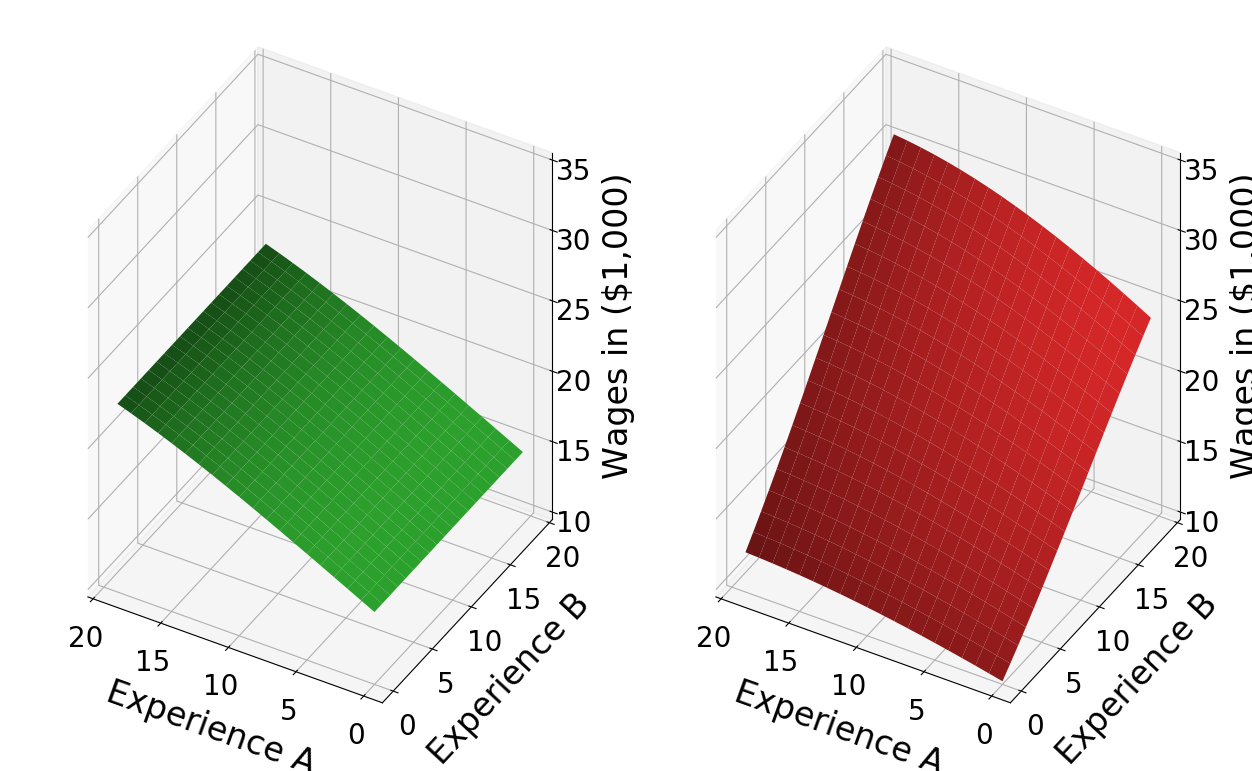

In [8]:
fig

The next figure shows that the returns to schooling are larger in Occupation B. While its initial wage is lower, it does increase faster with schooling compared to Occupation A. The graphs are generated by holding experience in both sectors constant at five years.

In [9]:
years_schooling = np.arange(10, 21)

wage_a = np.exp(
    skill_price_occ_a + ret_schooling_occ_a * years_schooling
    + ret_exp_a_occ_a * 5 + ret_exp_a_sq_occ_a * 5 ** 2
    + ret_exp_b_occ_a * 5 + ret_exp_b_sq_occ_a * 5 ** 2
)

wage_b = np.exp(
    skill_price_occ_b + ret_schooling_occ_b * years_schooling
    + ret_exp_a_occ_b * 5 + ret_exp_a_sq_occ_b * 5 ** 2
    + ret_exp_b_occ_b * 5 + ret_exp_b_sq_occ_b * 5 ** 2
)

fig, ax = plt.subplots()

ax.plot(years_schooling, wage_a / 1000, color="C2", label="Occupation A")
ax.plot(years_schooling, wage_b / 1000, color="C3", label="Occupation B")

ax.set_xlim(10, 20)
ax.set_ylim(14, 30)
ax.set_yticks(range(16, 31, 2))

ax.set_xlabel("Years of Schooling")
ax.set_ylabel("Wages (in \$1,000)")

ax.legend();

In [10]:
fig.savefig("../../../../cscubs/figures/fig-returns-to-schooling.png")

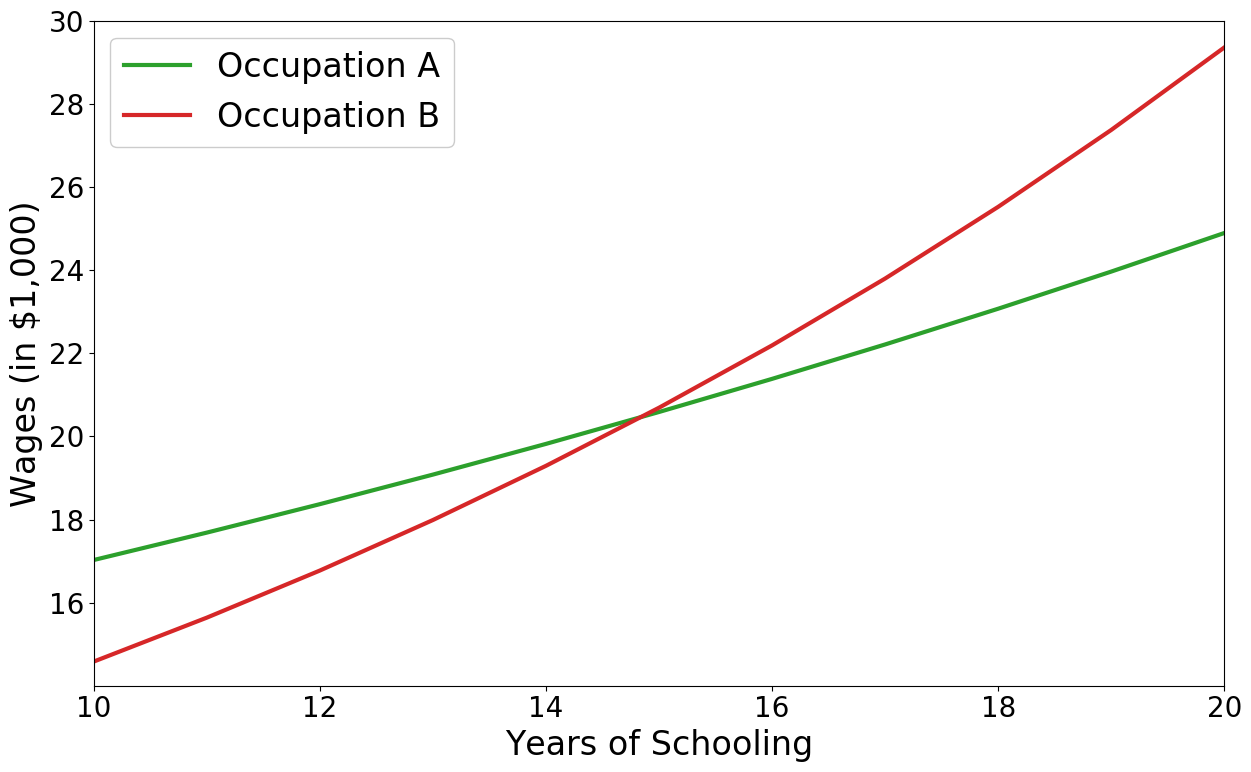

In [11]:
fig

Simulating a sample of 1,000 agents from the model allows us to study how these features interact in determining agent decisions over their life cycle. Note that all agents start out identically, different choices are simply the cumulative effects of different shocks. Initially, 50% of agents increase their level of schooling but the share of agents enrolled in school declines sharply over time. The share working in Occupation A hovers around 40% at first, but then declines to 21%. Occupation B continuously gains in popularity, initially only 11% work in Occupation B but its share increases to about 77%. Around 1.5% stay at home each period. We visualize this choice pattern in detail below.

In [12]:
fig, ax = plt.subplots()

shares = df.groupby("Period").Choice.value_counts().unstack()[[4, 3, 1, 2]].div(1000)

shares.plot.bar(stacked=True, ax=ax, width=0.8)

ax.legend(
    labels=["Home", "School", "Occupation A", "Occupation B"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=4
)

ax.set_ylim(0, 1)

ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5), rotation="horizontal")

ax.set_ylabel("Share of population");

In [13]:
fig.savefig("../../../../cscubs/figures/fig-lifecycle-choices.png")

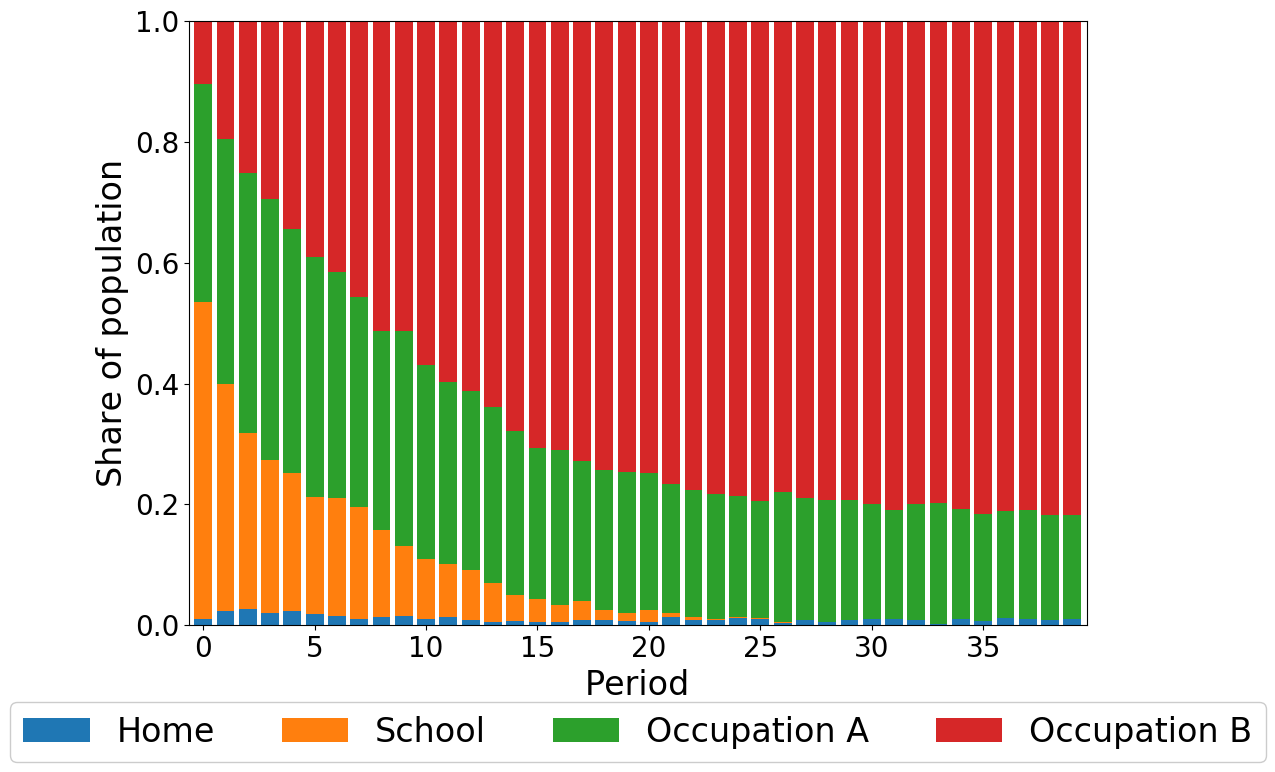

In [14]:
fig

We start out with the large majority of agents working in Occupation A. Eventually, however, most agents end up working in Occupation B. As the returns to education are higher for Occupation B and previous work experience is transferable, Occupation B gets more and more attractive as agents increase their level of schooling and gain experience in the labor market.

For the next part, we assume that the cost of education in hight school and college go up from 4,000 to 10,000. Again, we simulate a sample of 1,000 agents and look at the distribution of choices over the life cycle. As the cost of education is increases, fewer people reenroll into high school or college. This drives down returns in occupation B which is still the choice of the majority, but now the stable share is 65% instead of 80% in the previous example. Also, more people stay at home since without education they never earn more than their reward for home production.

In [15]:
params_spec.loc[("coeffs_edu", "reenroll_col"), "para"] = -10000
params_spec.loc[("coeffs_edu", "reenroll_hs"), "para"] = -10000

respy_obj = RespyCls(params_spec, options_spec)
# Do not use this lower function in general. We use it here, so that
# the simulated data is not written to disk.
state_space, df = respy_interface(respy_obj, "simulate")

In [16]:
fig, ax = plt.subplots()

shares = df.groupby("Period").Choice.value_counts().unstack()[[4, 3, 1, 2]].div(1000)

shares.plot.bar(stacked=True, ax=ax, width=0.8)

ax.legend(
    labels=["Home", "School", "Occupation A", "Occupation B"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=4
)

ax.set_ylim(0, 1)

ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5), rotation="horizontal")

ax.set_ylabel("Share of population");

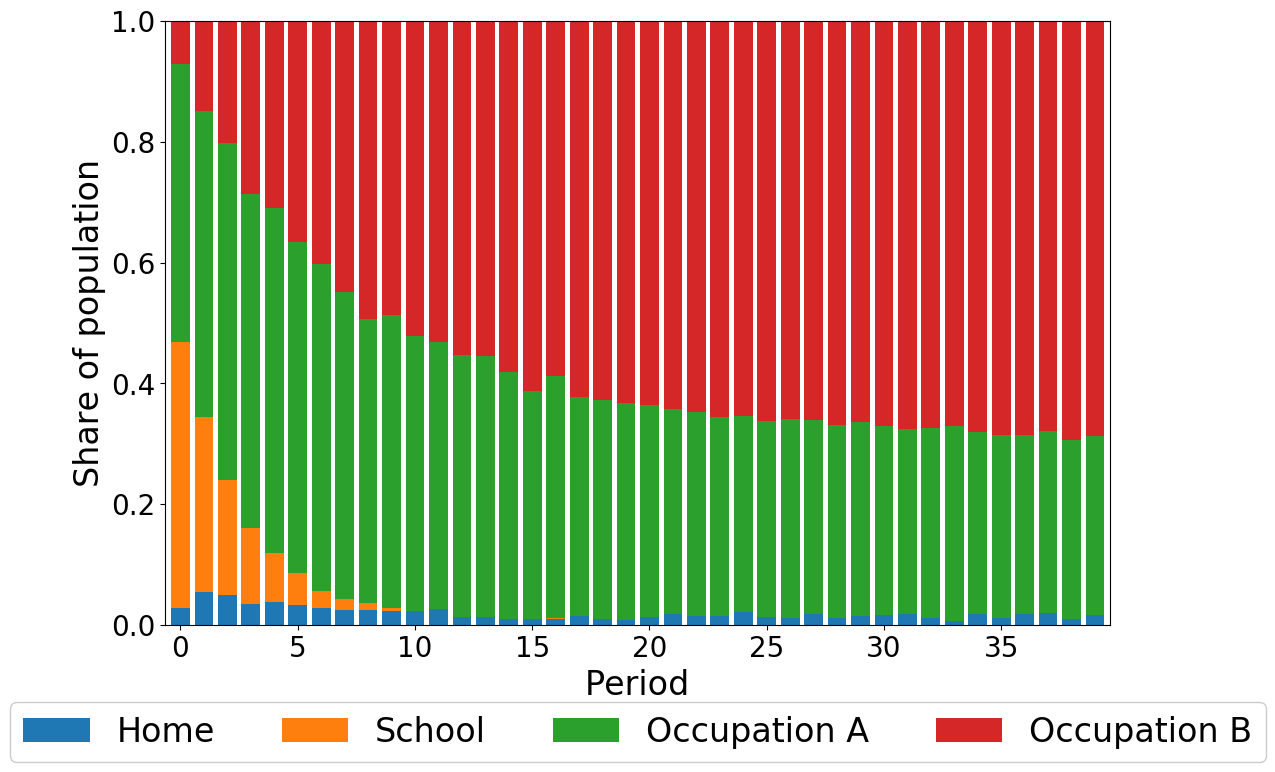

In [17]:
fig

In [18]:
os.chdir("..")
shutil.rmtree(folder)